# **Hierarchical Clustering Model Theory**


## Hierarchical Clustering

---

## Theory
Hierarchical Clustering is an unsupervised machine learning algorithm used to build a hierarchy of clusters. Unlike K-Means, it does not require the number of clusters to be specified in advance. Instead, it creates a tree-like structure (dendrogram) that shows the relationships between data points and clusters at different levels of granularity. It is widely used in biology (e.g., phylogenetic trees), social network analysis, and market segmentation.

The main idea is to:
- Start by treating each data point as a single cluster.
- Merge the closest pairs of clusters iteratively based on a distance metric.
- Repeat until all data points are in a single cluster or a stopping condition is met.

---

## Mathematical Foundation
- **Distance Metrics**:
  - **Euclidean Distance**:
    $$ d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2} $$
  - **Manhattan Distance**:
    $$ d(x, y) = \sum_{i=1}^{n} |x_i - y_i| $$
  - **Cosine Similarity**:
    $$ \text{cosine}(x, y) = \frac{x \cdot y}{\|x\| \|y\|} $$

- **Linkage Criteria**:
  - **Single Linkage**: Distance between two clusters is the shortest distance between any two points in the clusters.
    $$ d(C_i, C_j) = \min_{x \in C_i, y \in C_j} d(x, y) $$
  - **Complete Linkage**: Distance between two clusters is the longest distance between any two points in the clusters.
    $$ d(C_i, C_j) = \max_{x \in C_i, y \in C_j} d(x, y) $$
  - **Average Linkage**: Distance between two clusters is the average distance between all pairs of points in the clusters.
    $$ d(C_i, C_j) = \frac{1}{|C_i| |C_j|} \sum_{x \in C_i} \sum_{y \in C_j} d(x, y) $$
  - **Ward's Method**: Minimizes the variance when merging clusters.
    $$ d(C_i, C_j) = \frac{|C_i| |C_j|}{|C_i| + |C_j|} \|\mu_i - \mu_j\|^2 $$

---

## Algorithm Steps
1. **Initialization**:
   - Treat each data point as a single cluster.
   - Compute the distance matrix between all pairs of clusters.

2. **Merge Clusters**:
   - Find the pair of clusters with the smallest distance.
   - Merge them into a single cluster.
   - Update the distance matrix to reflect the new cluster.

3. **Repeat**:
   - Repeat the merge step until all data points are in a single cluster or a stopping condition is met.

4. **Dendrogram**:
   - Visualize the hierarchy of clusters using a dendrogram.

---

## Key Parameters
- **n_clusters**: The number of clusters to form (if cutting the dendrogram).
- **affinity**: The distance metric to use (e.g., `euclidean`, `manhattan`, `cosine`).
- **linkage**: The linkage criterion to use (e.g., `single`, `complete`, `average`, `ward`).
- **distance_threshold**: The maximum distance between clusters to merge (used for stopping early).

---

## Advantages
- Does not require the number of clusters to be specified in advance.
- Provides a hierarchical structure (dendrogram) for better interpretability.
- Works well for small to medium-sized datasets.
- Can handle non-spherical clusters better than K-Means.

---

## Disadvantages
- Computationally expensive for large datasets (\( O(n^3) \) for some methods).
- Sensitive to noise and outliers.
- Once a merge is done, it cannot be undone (greedy approach).
- Requires careful choice of distance metric and linkage criterion.

---

## Implementation Tips
- Use **scaling** to ensure all features contribute equally to the distance metric.
- Choose the **linkage criterion** based on the problem (e.g., `ward` for compact clusters, `single` for elongated clusters).
- Use a **dendrogram** to determine the optimal number of clusters.
- For large datasets, consider using **agglomerative clustering** with a `distance_threshold` to stop early.

---

## Applications
- Gene expression analysis (biology)
- Social network analysis
- Document clustering
- Market segmentation
- Image segmentation

Hierarchical Clustering is a powerful and interpretable clustering method that provides a detailed view of the relationships between data points. While it has limitations, it is a valuable tool for exploratory data analysis and small to medium-sized datasets.

# Model Evaluation for Hierarchical Clustering

---

### 1. Cophenetic Correlation Coefficient (CPCC)
**Formula:**
$$
\text{CPCC} = \frac{\sum_{i<j} (d_{ij} - \bar{d})(c_{ij} - \bar{c})}{\sqrt{\sum_{i<j} (d_{ij} - \bar{d})^2 \sum_{i<j} (c_{ij} - \bar{c})^2}}
$$
**Description:**
- Measures how well the hierarchical clustering preserves the pairwise distances between the original data points.
- Compares the original distance matrix with the cophenetic distance matrix.

**Interpretation:**
- Ranges from -1 to 1.
- Values close to 1 indicate a strong correlation between the original distances and the cophenetic distances.

---

### 2. Dendrogram Analysis
**Description:**
- A tree-like diagram that visualizes the hierarchical clustering process.
- Shows how clusters are merged or split at different distances.

**Interpretation:**
- The height of the branches indicates the distance at which clusters are merged.
- Helps determine the optimal number of clusters by identifying significant gaps in the dendrogram.

---

### 3. Silhouette Score
**Formula:**
$$
\text{Silhouette Score} = \frac{b - a}{\max(a, b)}
$$
**Description:**
- Measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
- Ranges from -1 to 1.

**Interpretation:**
- Values close to 1 indicate well-separated clusters.
- Values close to 0 indicate overlapping clusters.
- Negative values suggest incorrect clustering.

---

### 4. Davies-Bouldin Index
**Formula:**
$$
\text{DBI} = \frac{1}{k} \sum_{i=1}^k \max_{j \neq i} \left( \frac{\sigma_i + \sigma_j}{d(c_i, c_j)} \right)
$$
**Description:**
- Measures the average similarity ratio of each cluster with the cluster that is most similar to it.
- Lower values indicate better clustering.

**Interpretation:**
- Values closer to 0 indicate better-defined clusters.
- Sensitive to the number of clusters and their separation.

---

### 5. Calinski-Harabasz Index
**Formula:**
$$
\text{CHI} = \frac{\text{Between-Cluster Dispersion}}{\text{Within-Cluster Dispersion}} \times \frac{N - k}{k - 1}
$$
**Description:**
- Measures the ratio of between-cluster dispersion to within-cluster dispersion.
- Higher values indicate better-defined clusters.

**Interpretation:**
- Higher values indicate better clustering.
- Useful for comparing different numbers of clusters.

---

### 6. Rand Index
**Formula:**
$$
\text{Rand Index} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
$$
**Description:**
- Measures the similarity between two clusterings by counting pairs of points that are assigned to the same or different clusters in both clusterings.

**Interpretation:**
- Ranges from 0 to 1, where 1 indicates perfect agreement.
- Requires ground truth labels for evaluation.

---

### 7. Adjusted Rand Index (ARI)
**Formula:**
$$
\text{ARI} = \frac{\text{Rand Index} - \text{Expected Rand Index}}{\max(\text{Rand Index}) - \text{Expected Rand Index}}
$$
**Description:**
- Adjusted version of the Rand Index that accounts for chance agreement.
- Ranges from -1 to 1.

**Interpretation:**
- Values close to 1 indicate strong agreement.
- Values close to 0 or negative indicate random or poor clustering.

---

### 8. Homogeneity, Completeness, and V-Measure
**Formulas:**
- **Homogeneity:**  
  $$
  h = 1 - \frac{H(C|K)}{H(C)}
  $$
- **Completeness:**  
  $$
  c = 1 - \frac{H(K|C)}{H(K)}
  $$
- **V-Measure:**  
  $$
  v = 2 \cdot \frac{h \cdot c}{h + c}
  $$

**Description:**
- **Homogeneity:** Measures if each cluster contains only members of a single class.
- **Completeness:** Measures if all members of a given class are assigned to the same cluster.
- **V-Measure:** Harmonic mean of homogeneity and completeness.

**Interpretation:**
- Ranges from 0 to 1, where 1 indicates perfect clustering.
- Requires ground truth labels for evaluation.

---

### 9. Linkage Criteria Evaluation
**Description:**
- Evaluates the performance of different linkage criteria (e.g., single, complete, average, Ward).
- Linkage criteria determine how distances between clusters are calculated.

**Interpretation:**
- **Single Linkage:** Tends to produce long, elongated clusters.
- **Complete Linkage:** Tends to produce compact, spherical clusters.
- **Average Linkage:** Balances single and complete linkage.
- **Ward Linkage:** Minimizes variance within clusters.

---

### 10. Cluster Stability
**Description:**
- Measures the consistency of clustering results across different subsamples of the data.
- Evaluated using techniques like bootstrapping or cross-validation.

**Interpretation:**
- Higher stability indicates more reliable clustering.
- Useful for assessing the robustness of hierarchical clustering.

---

## sklearn template [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

### class AgglomerativeClustering(n_clusters=2, *, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)

| **Parameter**               | **Description**                                                                                                                                     | **Default**      |
|----------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------|------------------|
| `n_clusters`               | The number of clusters to find                                                                                                                     | `2`              |
| `affinity`                 | Metric used to compute the linkage: 'euclidean', 'l1', 'l2', 'manhattan', 'cosine', or 'precomputed'                                               | `'euclidean'`    |
| `memory`                   | Used to cache the output of the computation of the tree                                                                                            | `None`           |
| `connectivity`             | Connectivity matrix or callable that defines the connectivity between samples                                                                      | `None`           |
| `compute_full_tree`        | Stop early the construction of the tree at `n_clusters` if `True`                                                                                  | `'auto'`         |
| `linkage`                  | Which linkage criterion to use: 'ward', 'complete', 'average', or 'single'                                                                         | `'ward'`         |
| `distance_threshold`       | The linkage distance threshold above which clusters will not be merged                                                                             | `None`           |
| `compute_distances`        | Compute distances between clusters even if `distance_threshold` is not used                                                                        | `False`          |

-

| **Attribute**              | **Description**                                                                                                                                     |
|----------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------|
| `labels_`                  | Cluster labels for each point                                                                                                                       |
| `n_clusters_`              | Number of clusters found                                                                                                                            |
| `n_connected_components_`  | Estimated number of connected components in the graph                                                                                               |
| `n_features_in_`           | Number of features seen during fit                                                                                                                  |
| `children_`                | The children of each non-leaf node in the tree                                                                                                      |
| `distances_`               | Distances between nodes in the corresponding place in `children_` (if `compute_distances=True`)                                                    |

-

| **Method**                 | **Description**                                                                                                                                     |
|----------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------|
| `fit(X)`                   | Fit the hierarchical clustering on the data                                                                                                         |
| `fit_predict(X)`           | Fit the hierarchical clustering on the data and return the cluster labels                                                                           |
| `get_params()`             | Get parameters for this estimator                                                                                                                   |
| `set_params()`             | Set the parameters of this estimator                                                                                                                |

# Hierarchical Clustering - Example

## Data loading

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

##  Data processing

In [2]:
# Load the Iris dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)  # Features
y = pd.Series(data.target)  # Target variable (for comparison, not used in clustering)

# Display the first few rows of the dataset
print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())

Features (X):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target (y):
0    0
1    0
2    0
3    0
4    0
dtype: int64


In [3]:
# Standardize the features (Hierarchical Clustering is sensitive to feature scales)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier plotting
X_scaled = pd.DataFrame(X_scaled, columns=data.feature_names)

# Display the first few rows of the scaled data
print("Scaled Features:")
print(X_scaled.head())

Scaled Features:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


## Plotting data

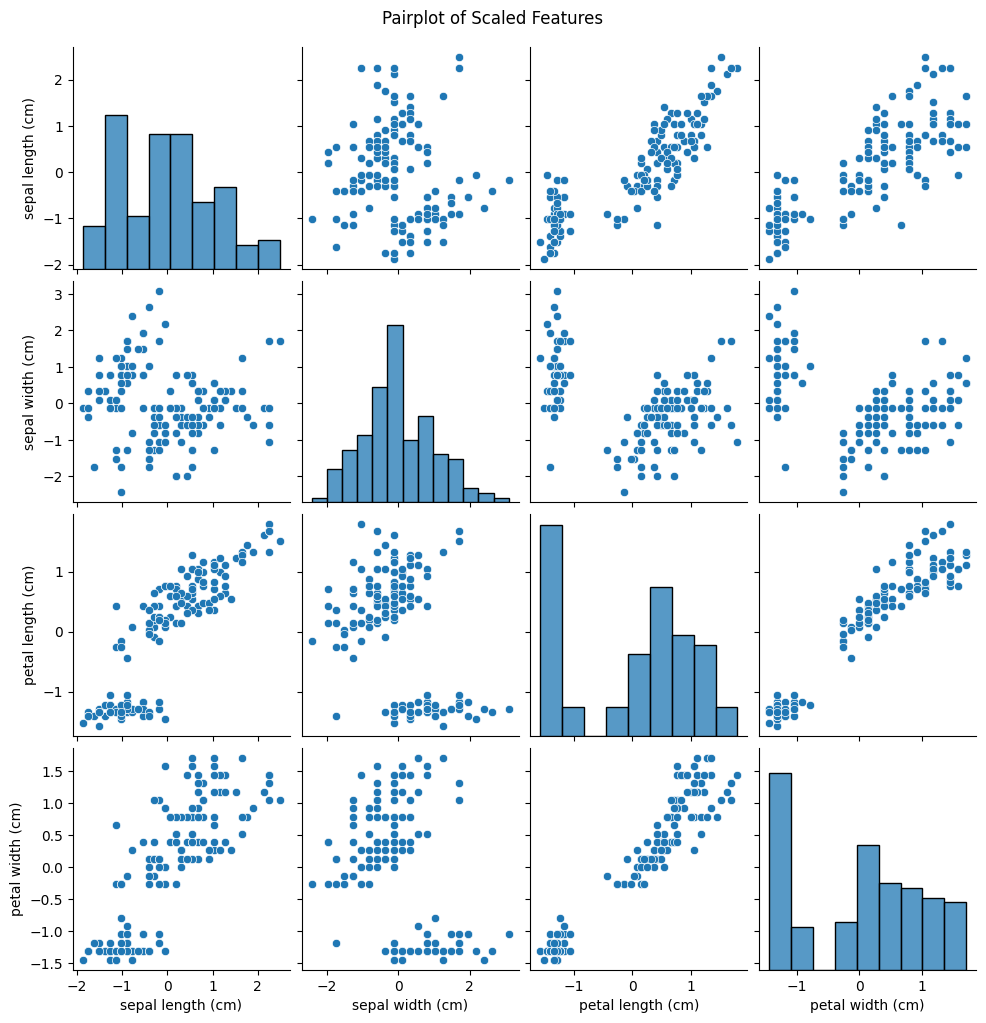

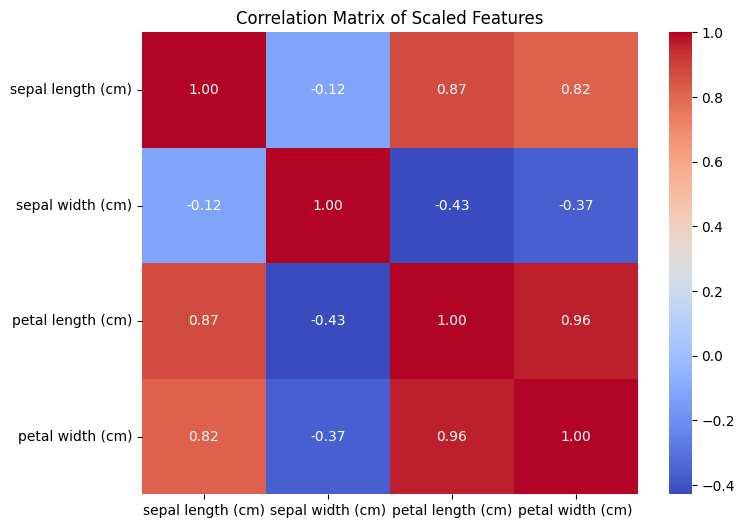

In [4]:
# Plot the distribution of features
sns.pairplot(X_scaled)
plt.suptitle("Pairplot of Scaled Features", y=1.02)
plt.show()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(X_scaled.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Scaled Features")
plt.show()

## Model definition

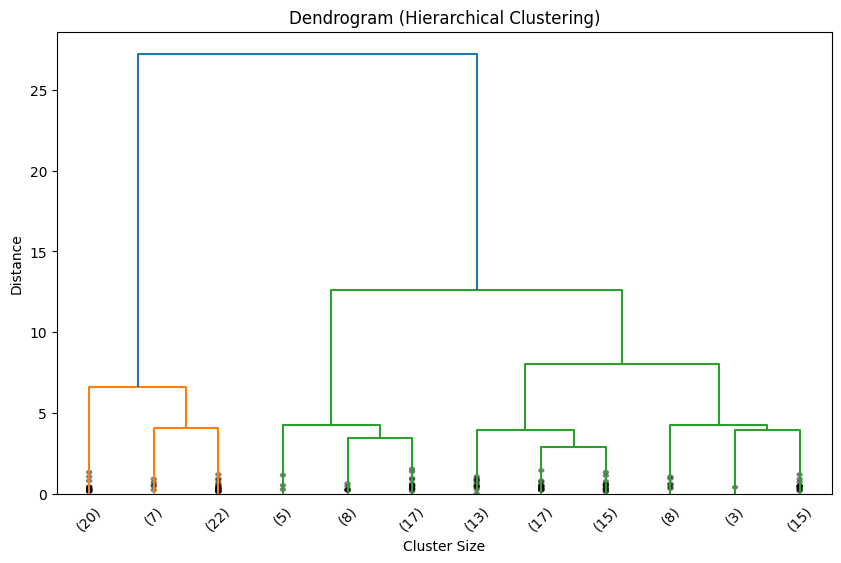

Cluster Labels:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


In [5]:
# Perform hierarchical clustering using linkage
Z = linkage(X_scaled, method='ward')  # 'ward' minimizes the variance of clusters being merged

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=10, show_contracted=True)
plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

# Cut the dendrogram to form clusters
num_clusters = 3  # We assume 3 clusters (same as Iris dataset)
cluster_labels = fcluster(Z, t=num_clusters, criterion='maxclust')

# Add cluster labels to the original dataset for visualization
X['Cluster'] = cluster_labels
print("Cluster Labels:")
print(X.head())

## Model evaulation

Silhouette Score: 0.4467


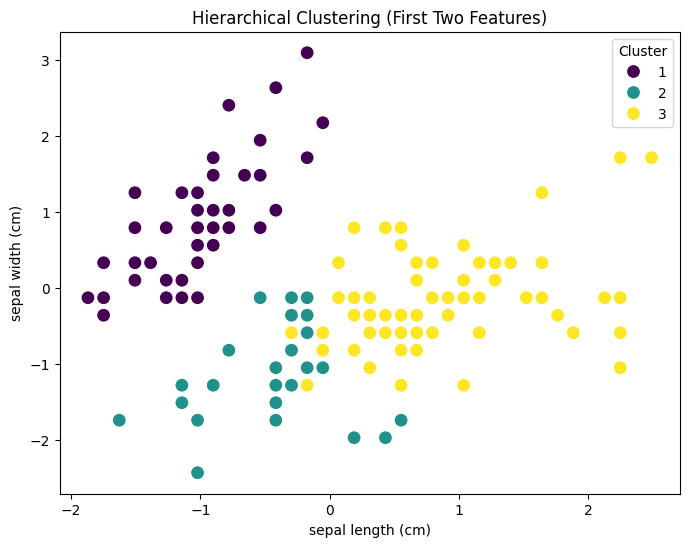

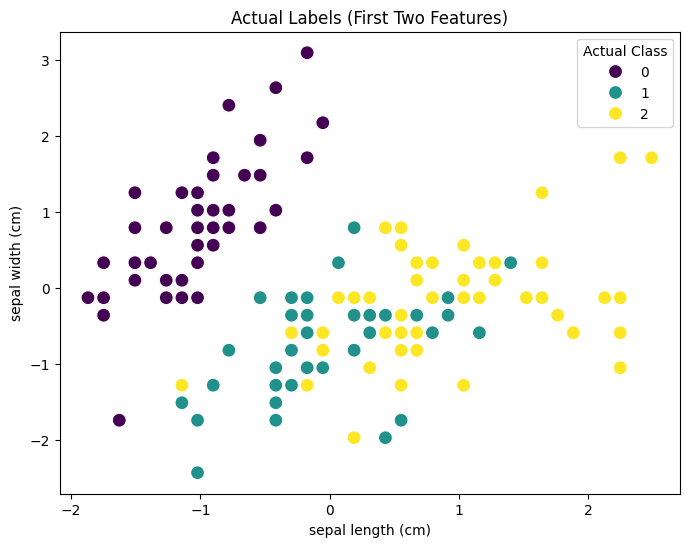

In [6]:
# Evaluate the clustering using Silhouette Score
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

# Plot the clusters (using the first two features for visualization)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled.iloc[:, 0], y=X_scaled.iloc[:, 1], hue=cluster_labels, palette='viridis', s=100)
plt.title("Hierarchical Clustering (First Two Features)")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.legend(title='Cluster')
plt.show()

# Compare clusters with actual labels (for visualization purposes only)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled.iloc[:, 0], y=X_scaled.iloc[:, 1], hue=y, palette='viridis', s=100)
plt.title("Actual Labels (First Two Features)")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.legend(title='Actual Class')
plt.show()